<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793654/blob/main/Actividad8_IBM(Mod_5_MER).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y analítica de datos
## Actividad 8
### Cursos de IBM
### Data Analysis With Python
## Modulo 5
### Profesor: María de la Paz Rico Fernández
### Profesor Tutor: Roberto Antonio Guevara González
#### Bernardo Mijangos Flores
#### Matricula A01793654
##Laboratorio 5

# Evaluación y refinamiento de modelos predictivos

In [81]:
# obtenemos las librerias necesarias para este laboratorio

import pandas as pd
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual   # librerias para el plotting
from sklearn.model_selection import train_test_split  #libreria para dividr los datoa aleatoriamente
from sklearn.linear_model import LinearRegression # libreria para el modelo de regresion lineal
from sklearn.model_selection import cross_val_score   # libreria para validacion cruzada
from sklearn.model_selection import cross_val_predict   # libreria para predecir la salida de validacion cruzada
from sklearn.preprocessing import PolynomialFeatures   # libreria para la regresion polinomial
from sklearn.linear_model import Ridge   # libreria de Ridge regresion
from tqdm import tqdm 
from sklearn.model_selection import GridSearchCV   # para buscar el mejor hiperparametro

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# obtenemos el dataset del laboratorio del siguiente link

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [3]:
# obtenemos el dataframe completo

df1 = pd.read_csv(path)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   Unnamed: 0.1       201 non-null    int64  
 2   symboling          201 non-null    int64  
 3   normalized-losses  201 non-null    int64  
 4   make               201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [4]:
# obtenemos solo datos numericos

df=df1._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


# Funciones para plotting

In [27]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [28]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Paso 1:

Training y Testing

In [29]:
# obtenemos la etiqueta de price en y_data

y_data = df['price']

In [30]:
# quitamos price en el dataframe x_data

x_data=df.drop('price',axis=1)

In [31]:
# Dividimos aleatoriamente los datos en training y testing con la funcion train_test_split
# con el parametro test_size estable el 10% de los datos para testing

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


# Pregunta 1

Utilice la función "train_test_split" para dividir el conjunto de datos de modo que el 40% de las muestras se utilicen para la prueba.  Establezca el parámetro "random_state" igual a cero.  La salida de la función debe ser la siguiente: "x_train1", "x_test1", "y_train1" y "y_test1".


In [32]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.40, random_state=0)
print("Numero de test1      :",x_test1.shape[0])
print("Numero de training1  :",x_train1.shape[0])

Numero de test1      : 81
Numero de training1  : 120


In [33]:
# se crea la regresion lineal

lre=LinearRegression()

In [34]:
# ajustando el modelo con la variable "housepower"

lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [35]:
# calculamos R^2 en los datos de prueba

lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [36]:
# Se puede observar que el R^2 es mucho más pequeño usando los datos de prueba en comparación con los datos de entrenamiento.

lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

# Pregunta 2:

Encuentre el R^2 en los datos de prueba usando el 40 % del conjunto de datos para la prueba.

In [38]:
lre1=LinearRegression()
lre1.fit(x_train1[['horsepower']],y_train1)
lre1.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

A veces no tiene suficientes datos de prueba; como resultado, es posible que desee realizar una validación cruzada. Repasemos varios métodos que puede usar para la validación cruzada.

# Cross-Validation Score

In [39]:
# ingresamos las variables ("housepower") y los datos de salida (y_data).
# El parámetro 'cv' determina el número de pliegues "folds". En este caso son 4.

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [40]:
# el default scoreing es R^2. Cada elemento de la matriz tiene el valor promedio de R^2 para el pliegue:

Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [41]:
# Caculamos el promedio y la desviación:

print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [42]:
# Usamos el error cuadrático negativo como puntaje configurando la métrica del parámetro 'scoring' en 'neg_mean_squared_error'.

-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

# Pregunta 3:

Calcule el R ^ 2 promedio usando dos pliegues "folds", luego encuentre el R ^ 2 promedio para el segundo pliegue utilizando la función "horsepower":

In [43]:
Rcross1=cross_val_score(lre1,x_data[['horsepower']], y_data,cv=2)
Rcross1.mean()

0.5166761697127429

Se puede usar la función 'cross_val_predict' para predecir la salida. La función divide los datos en el número especificado de pliegues, con un pliegue para prueba y los otros pliegues se usan para entrenamiento.

In [44]:
yhat = cross_val_predict(lre1,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Paso 2

Overfitting, Underfitting y Selección de Modelo

Resulta que los datos de prueba, a veces denominados "datos fuera de muestra", son una medida mucho mejor de qué tan bien funciona su modelo en el mundo real. Una de las razones de esto es el sobreajuste.

In [45]:
# Se crea una regresión lineal múltiple y entrenar el modelo usando las variables 'housepower', 'curb-weight', 'engine-size' y 'highway-mpg'.

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [46]:
# Prediccion usando los datos de training

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [47]:
# Prediccion usando los datos de test

yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


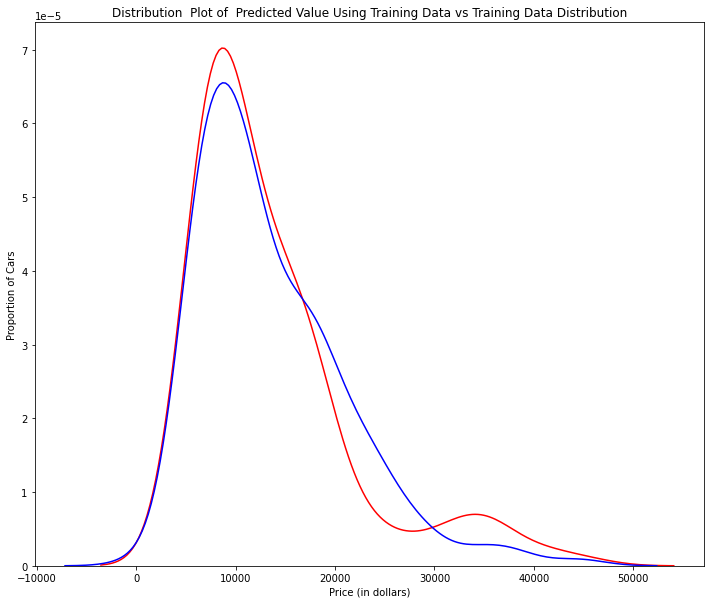

In [48]:
# Gráfica de valores pronosticados utilizando los datos de entrenamiento en comparación con los valores reales de los datos de entrenamiento.

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Hasta ahora, el modelo parece estar aprendiendo bien del conjunto de datos de entrenamiento. Pero, ¿qué sucede cuando el modelo encuentra nuevos datos del conjunto de datos de prueba? Cuando el modelo genera nuevos valores a partir de los datos de prueba, vemos que la distribución de los valores predichos es muy diferente de los valores objetivo reales.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


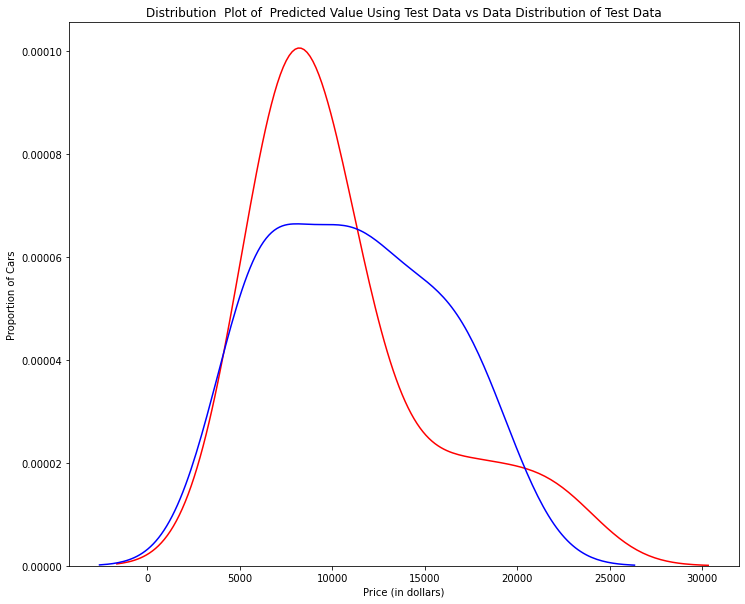

In [26]:
# Gráfico del valor predicho utilizando los datos de prueba en comparación con los valores reales de los datos de prueba.

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparando ambos graficos, es evidente que la distribución de los datos de prueba del primero es mucho mejor para ajustar los datos. Esta diferencia en la Figura 2 es evidente en el rango de 5000 a 15,000. Aquí es donde la forma de la distribución es extremadamente diferente. Veamos si la regresión polinomial también muestra una caída en la precisión de la predicción al analizar el conjunto de datos de prueba.

# Overfitting

El sobreajuste ocurre cuando el modelo se ajusta al ruido, pero no al proceso subyacente. Por lo tanto, al probar su modelo con el conjunto de prueba, su modelo no funciona tan bien ya que está modelando ruido, no el proceso subyacente que generó la relación.

In [50]:
# Creamos un modelo polinomial de grado 5.
# Usando el 55 por ciento de los datos para entrenamiento y el resto para pruebas:

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [51]:
# Realizaremos una transformación polinomial de grado 5 en la variable 'housepower'.

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [52]:
# Creemos un modelo de regresión lineal "poli" y lo entrenamos.

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [53]:
# Obtenemos la salida de nuestro modelo usando el método "predict". Asignamos los valores a "yhat".

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [54]:
# Tomamos los primeros cinco valores pronosticados y comparémoslos con los objetivos reales.

print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


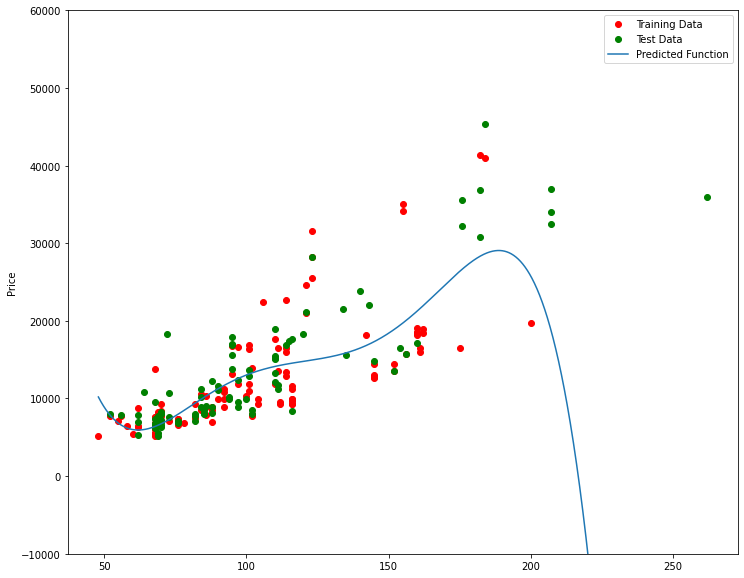

In [55]:
# Con la función "PollyPlot" mostramos los datos de entrenamiento, los datos de prueba y la función predicha.

PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Observajos un modelo de regresión polinomial donde los puntos rojos representan datos de entrenamiento, los puntos verdes representan datos de prueba y la línea azul representa la predicción del modelo.

Se observa que la función estimada parece rastrear los datos, pero alrededor de 200 caballos de fuerza, la función comienza a divergir de los puntos de datos.


In [56]:
# R^2 de los datos de entrenamiento

poly.score(x_train_pr, y_train)

0.556771690212023

In [57]:
# R^2 de los datos de prueba:

poly.score(x_test_pr, y_test)

-29.87134030204415

Se observa que el R ^ 2 para los datos de entrenamiento es 0.5567 mientras que en los datos de prueba fue -29.87. Cuanto menor sea el R^2, peor será el modelo. Un R^2 negativo es un signo de sobreajuste.

Text(3, 0.75, 'Maximum R^2 ')

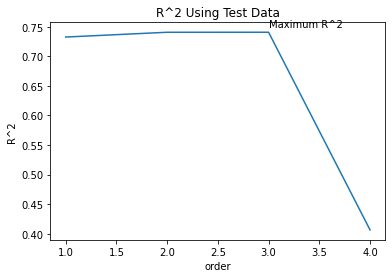

In [58]:
#  Cambio del R^2 en los datos de prueba para polinomios de diferente orden y luego se presentan los resultados:

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')   

Se observa que R ^ 2 aumenta gradualmente hasta que se usa un polinomio de orden tres. Luego, el R ^ 2 disminuye drásticamente en un polinomio de orden cuatro.

In [60]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [62]:
# Interfaz que permite experimentar con diferentes órdenes de polinomios y diferentes cantidades de datos.

interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

# Pregunta 4a)

Podemos realizar transformaciones polinómicas con más de una variable. Cree un objeto "PolynomialFeatures" "pr1" de grado dos.

In [64]:
pr1 = PolynomialFeatures(degree=2)
pr1

PolynomialFeatures()

# Pregunta 4b)

Transforme las muestras de training y testing para las variables 'horsepower', 'curb-weight', 'engine-size' y 'highway-mpg' usando el método "fit_transform".

In [65]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

# Pregunta 4c)

¿Cuántas dimensiones tiene la nueva función? usando el atributo "shape".

In [67]:
x_train_pr1.shape

(110, 15)

# Pregunta 4d)

Cree un modelo de regresión lineal "poly1". Entrena el objeto usando el método "fit" usando las variables polinómicas.

In [68]:
poly1=LinearRegression().fit(x_train_pr1,y_train)
poly1

LinearRegression()

# Pregunta 4e)

Use el método "predict" para predecir una salida en las variables polinómicas, luego use la función "DistributionPlot" para mostrar la distribución de la salida de prueba pronosticada frente a los datos de prueba reales.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


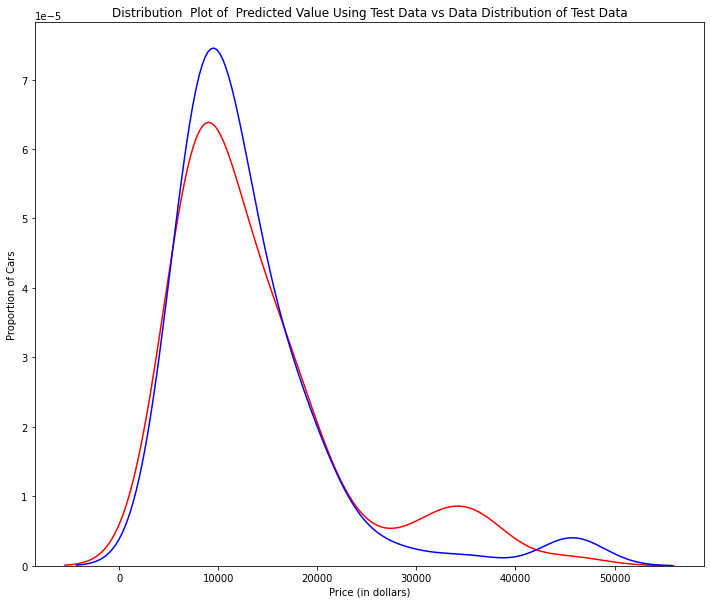

In [69]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

# Pregunta 4f)

Usando el gráfico de distribución anterior, describa (en palabras) las dos regiones donde los precios pronosticados son menos precisos que los precios reales.

El valor pronosticado es más alto que el valor real para los autos donde el precio oscila entre $10 000; por el contrario, el precio pronosticado es más bajo que el costo del precio en el rango de $30 000 a $40 000. Como tal, el modelo no es tan preciso en estos rangos.

# Paso 3

Ridge Regression

In [70]:
# Realizamos una transformación polinomial de grado dos en nuestros datos.

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [72]:
# Creamos una regresión Ridge, configurando el parámetro de regularización (alfa) en 0.1

RigeModel=Ridge(alpha=1)

In [73]:
# Ajustamos el modelo con el método de fit.

RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [74]:
# Obtenemos la prediccion

yhat = RigeModel.predict(x_test_pr)

In [75]:
# Comparamos las primeras cinco muestras predichas con nuestro conjunto de prueba:

print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [77]:
# Seleccionamos el valor de alfa que minimiza el error de prueba.
# Para hacerlo, podemos usar un bucle for.
# También hemos creado una barra de progreso para ver cuántas iteraciones hemos completado hasta ahora.

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:07<00:00, 133.12it/s, Test Score=0.564, Train Score=0.859]


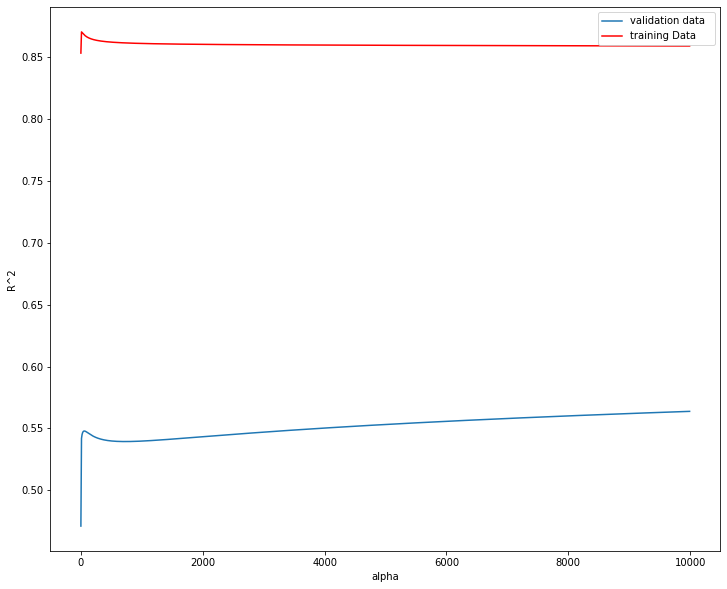

In [78]:
# Trazamos el valor de R^2 para diferentes alfas:

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

El grafico muestra La línea azul que representa el R^2 de los datos de validación y la línea roja representa el R^2 de los datos de entrenamiento. El eje x representa los diferentes valores de Alpha.

Aquí, el modelo se construye y prueba con los mismos datos, por lo que los datos de entrenamiento y prueba son los mismos.

La línea roja representa el R^2 de los datos de entrenamiento. A medida que alfa aumenta, R ^ 2 disminuye. Por lo tanto, a medida que aumenta alfa, el modelo funciona peor en los datos de entrenamiento

La línea azul representa el R^2 en los datos de validación. A medida que aumenta el valor de alfa, R ^ 2 aumenta y converge en un punto.

# Pregunta 5

Realice la regresión de Ridge. Calcule el R ^ 2 usando las características polinómicas, use los datos de entrenamiento para entrenar el modelo y use los datos de prueba para probar el modelo. El parámetro alfa debe establecerse en 10.

In [79]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

# Paso 4

Grid Search

El término alfa es un hiperparámetro. Sklearn tiene la clase GridSearchCV para simplificar el proceso de encontrar el mejor hiperparámetro.

Importemos GridSearchCV desde el módulo model_selection.

In [82]:
# Creamos un diccionario con valores de parametros

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [83]:
# Creamos la regresion ridge

RR=Ridge()
RR

Ridge()

In [84]:
# creamos el grid search de ridge

Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [85]:
# Ajuste del modelo

Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [86]:
# Encuentra los mejores valores de parámetros en los datos de validación.
# Podemos obtener el estimador con mejores parámetros y asignarlo a la variable BestRR de la siguiente manera:

BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [87]:
# probamos el modelo con los datos de test

BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

# Preguntas de revision

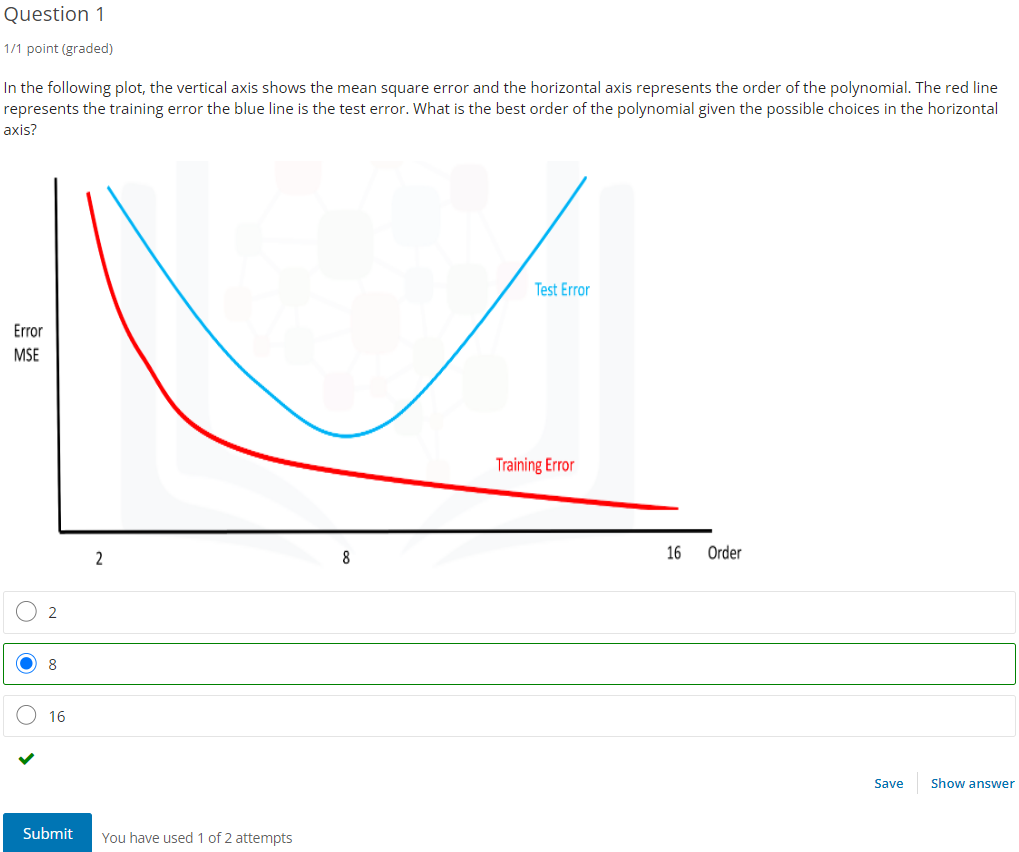

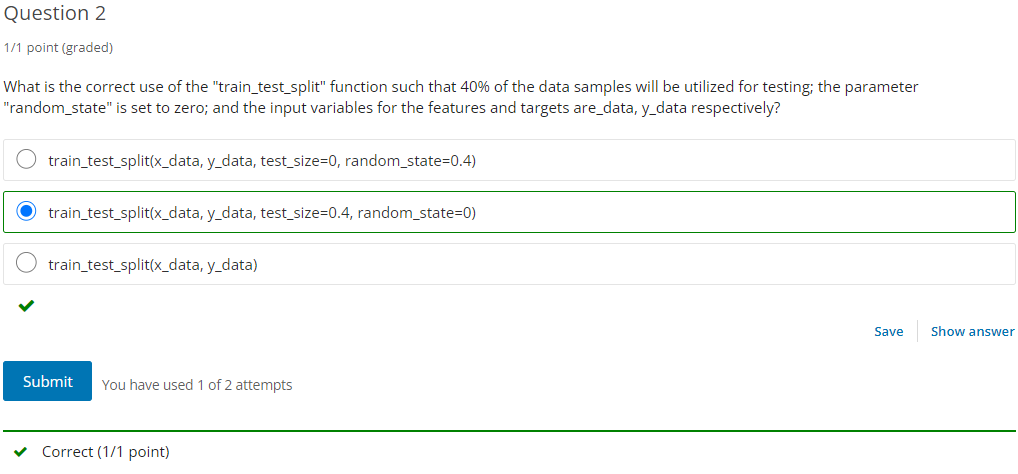

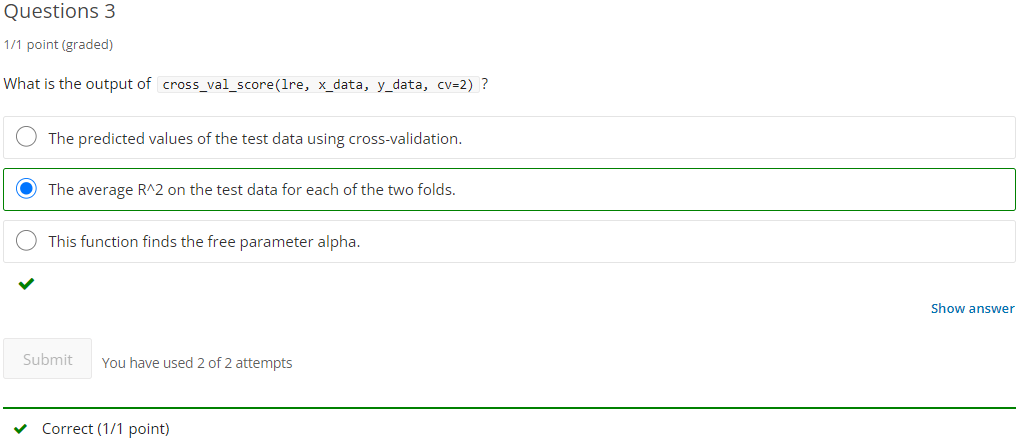

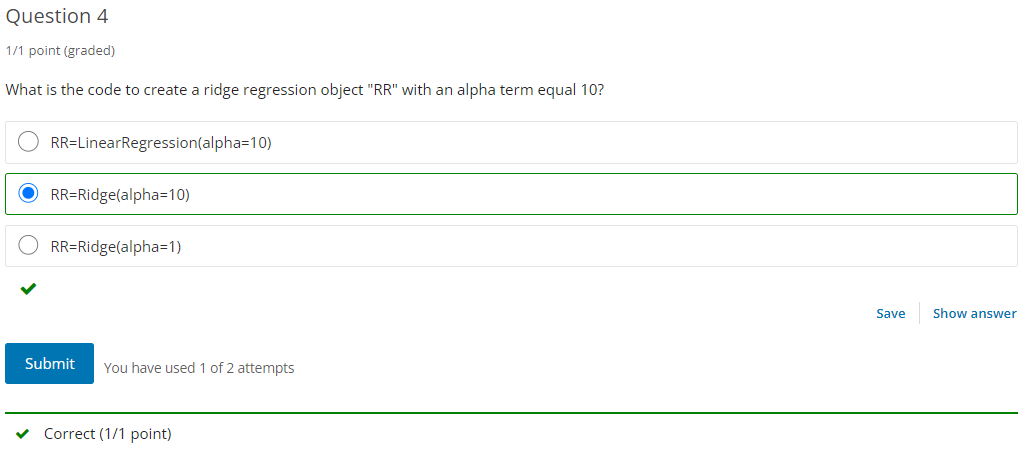

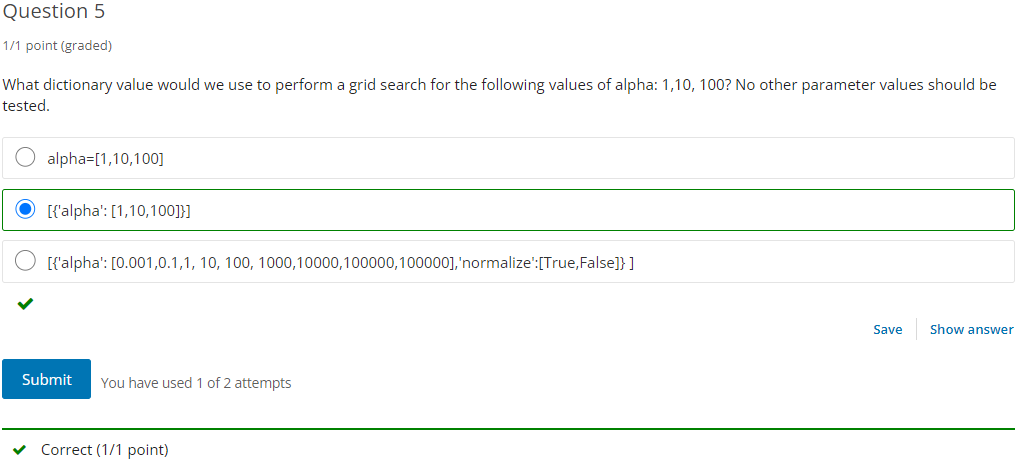